In [1]:
import os, sys
PROJECTPATH = '/Users/nils/Code2022/h3-gis'
sys.path.insert(0, PROJECTPATH)
os.environ.setdefault("DJANGO_SETTINGS_MODULE", "mygeo.settings")
os.environ.setdefault("DJANGO_PROJECT", "mygeo")
os.environ["DJANGO_ALLOW_ASYNC_UNSAFE"] = "true"

from mygeo import settings
print (settings.LOGGING_CONFIG)
os.chdir(PROJECTPATH)
import django
django.setup()
import json
import pprint
import geopandas
import shapely
import matplotlib
from django.core.serializers import serialize
from shapely.geometry import MultiLineString
from shapely.ops import triangulate

from world.models import parcel_mapping, world_mapping, Parcel, ZoningBase, zoningbase_mapping, \
    BuildingOutlines, buildingoutlines_mapping
from django.core.management.base import BaseCommand, CommandError


logging.config.dictConfig


**** RUNNING IN (insecure) DEVELOPMENT MODE ****


In [2]:
        apn = '4302030800'

        # Get parcel and building info for this zone.
        parcel = Parcel.objects.get(apn=apn)
        buildings = BuildingOutlines.objects.filter(geom__intersects=parcel.geom)
        serialized_parcel = serialize('geojson', [parcel], geometry_field='geom', )
        serialized_buildings = serialize('geojson', buildings, geometry_field='geom', fields=('apn', 'geom',))
        parcel_data_frame = geopandas.GeoDataFrame.from_features(json.loads(serialized_parcel), crs="EPSG:4326")
        buildings_data_frame = geopandas.GeoDataFrame.from_features(json.loads(serialized_buildings), crs="EPSG:4326")
        parcel_in_utm = parcel_data_frame.to_crs(parcel_data_frame.estimate_utm_crs())
        buildings_in_utm = buildings_data_frame.to_crs(buildings_data_frame.estimate_utm_crs())

        # pprint.pprint(parcel.__dict__)
        lot_square_meters = parcel_in_utm.area
        print ("Lot: ", lot_square_meters)
        print ("buildings: ", buildings_in_utm.area)
        assert (len(parcel_in_utm.boundary) == 1)
        assert (len(buildings_in_utm.boundary) == 2)
        assert (len(parcel_in_utm.boundary[0].geoms) == 1)
        assert (len(buildings_in_utm.boundary[0].geoms) == 1)

        # TODO: Algorithm currently only uses first building. extend it to multiple buildings
        boundary_line_string = parcel_in_utm.boundary[0].geoms[0]
        building_line_string = buildings_in_utm.boundary[1].geoms[0]
        bounds = boundary_line_string.bounds
        boundary_line_string = shapely.affinity.translate(boundary_line_string, xoff=-bounds[0], yoff=-bounds[1])
        building_line_string = shapely.affinity.translate(building_line_string, xoff=-bounds[0], yoff=-bounds[1])
        # pprint.pprint(list(boundary_line_string.coords))
        # pprint.pprint(list(building_line_string.coords))
        triangles = triangulate (MultiLineString([boundary_line_string, building_line_string]))
        # pprint.pprint([triangle.wkt for triangle in triangles])
    

Lot:  0    1034.619544
dtype: float64
buildings:  0     41.803916
1    146.275525
dtype: float64


In [4]:
triangles.append(building_line_string)

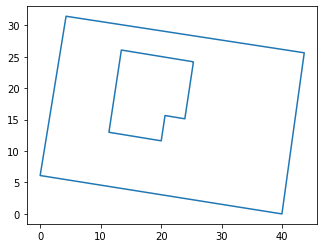

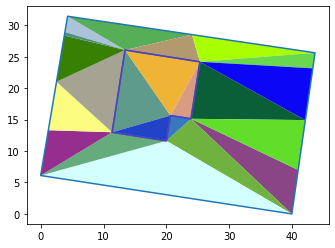

In [63]:
base = geopandas.GeoDataFrame(geometry=[building_line_string, boundary_line_string], crs="EPSG:4326")
base.plot()

trigeo = geopandas.GeoDataFrame(geometry=[building_line_string, boundary_line_string], crs="EPSG:4326")
p = trigeo.plot()
colorkeys = list(mcolors.XKCD_COLORS.keys())
for i in range(len(triangles)):
    geopandas.GeoSeries(triangles[i]).plot(ax=p, color=colorkeys[i % len(colorkeys)])

In [17]:
[x.intersection(boundary_line_string) for x in triangles]

In [24]:
list(range(25))

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24]

In [61]:
import matplotlib.colors as mcolors

list(mcolors.XKCD_COLORS.keys())

['xkcd:cloudy blue',
 'xkcd:dark pastel green',
 'xkcd:dust',
 'xkcd:electric lime',
 'xkcd:fresh green',
 'xkcd:light eggplant',
 'xkcd:nasty green',
 'xkcd:really light blue',
 'xkcd:tea',
 'xkcd:warm purple',
 'xkcd:yellowish tan',
 'xkcd:cement',
 'xkcd:dark grass green',
 'xkcd:dusty teal',
 'xkcd:grey teal',
 'xkcd:macaroni and cheese',
 'xkcd:pinkish tan',
 'xkcd:spruce',
 'xkcd:strong blue',
 'xkcd:toxic green',
 'xkcd:windows blue',
 'xkcd:blue blue',
 'xkcd:blue with a hint of purple',
 'xkcd:booger',
 'xkcd:bright sea green',
 'xkcd:dark green blue',
 'xkcd:deep turquoise',
 'xkcd:green teal',
 'xkcd:strong pink',
 'xkcd:bland',
 'xkcd:deep aqua',
 'xkcd:lavender pink',
 'xkcd:light moss green',
 'xkcd:light seafoam green',
 'xkcd:olive yellow',
 'xkcd:pig pink',
 'xkcd:deep lilac',
 'xkcd:desert',
 'xkcd:dusty lavender',
 'xkcd:purpley grey',
 'xkcd:purply',
 'xkcd:candy pink',
 'xkcd:light pastel green',
 'xkcd:boring green',
 'xkcd:kiwi green',
 'xkcd:light grey green',
 